In [7]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

fair_probs = torch.ones([6]) / 6
"""
multinomial.Multinomial() 是 PyTorch 中用于生成多项随机变量的函数。它接受两个参数：total_count 和 probs。
total_count 表示抽样的次数。在这里使用的是 1，意味着只进行一次抽样。
probs 是包含各个类别的概率的张量。而 fair_probs 表示每个类别的概率均为 1/6，所以它是一个长度为 6 的张量，每个元素的值都为 1/6。
"""
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 0., 1.])

In [8]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1710, 0.1610, 0.1760, 0.1660, 0.1620, 0.1640])

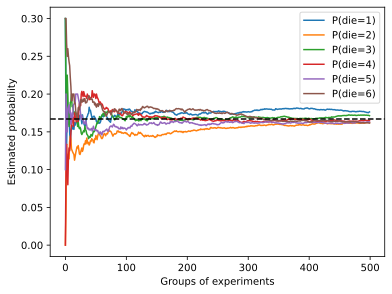

In [9]:
# 500组实验，每组抽取10个样本，服从fair_probs概率分布
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
# 计算累积和
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()